# Análisis Exploratorio de Datos (EDA) de Airbnb en Buenos Aires
<br>
El EDA es una herramienta de análisis para una revisión iterativa de las bases de datos con la cual describimos las principales características usando estadística descriptiva y visualización de datos.

## Contenido
1. Fuente de datos
2. Descripción de los datos
3. Missing values
4. Limpieza de datos
5. Visualización de datos
6. EDA un proceso iterativo
7. Referencias

## 1. Fuente de datos

Los datos fueron obtenidos a través del [archivo csv](http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2022-09-22/visualisations/listings.csv) con el resumen de información y métricas para listados de alquiler por la plataforma Airbnb en Buenos Aires con fecha al 22 de septiembre. 
<br>
<br>
Inside Airbnb es un proyecto impulsado por una misión que proporciona datos y abogacía sobre el impacto de Airbnb en las comunidades residenciales, cuyo objetivo de proporcionar datos que cuantifiquen el impacto de los alquileres a corto plazo en las viviendas y las comunidades residenciales, así como crear una plataforma para apoyar la promoción de políticas para proteger nuestras ciudades de los impactos de los alquileres a corto plazo. -alquileres a plazo.
<br>
<br>
Acerca de [Inside Airbnb](https://insideairbnb.com/)
<br>
<br>
Principios de la Comunidad:
<br>
- Toma solo los datos que necesites.
- No elimine datos del sitio; si desea suscribirse a los datos directamente, envíe un correo electrónico a data@insideairbnb.com
- No vuelva a publicar los datos. Creemos que este sitio proporciona el mejor contexto para los datos.
- No apreciamos los scripts que descargan los datos cada vez que los depura.
- Los profesores que asignan los datos para un curso, deben tener en cuenta las pautas anteriores.
- Las atribuciones en la investigación deben incluir algo más que una cita.
- Piense en cómo podría retribuir al proyecto, o crear o contribuir a una comunidad sobre el proyecto o los datos.
- Considere la misión del proyecto y cómo su uso de los datos puede contribuir a ello.
- Haz un buen uso de los datos.

## 2. Descricpión de los datos

### Diccionario de datos

`id` — identificador único asignado a la propiedad
<br>
`name` — nombre de la propiedad
<br>
`host_id`— identificador único asignado al anfitrión
<br>
`host_name` — nombre del anfitrión
<br>
`neighbourhood_group` — grupo de barrios
<br>
`neighbourhood_name` — nombre del barrio
<br>
`latitude` — latitud de la propiedad (y)
<br>
`longitude` — longitud de la propiedad (x)
<br>
`room_type` — tipo de cuarto
<br>
`price` — precio por noche en pesos argentinos
<br>
`minimum_nights` — mínimo de noches
<br>
`number_of_reviews` — número de reseñas
<br>
`last_review` — fecha de la útlima reseña
<br>
`reviews_per_month` — número de reseñas por mes
<br>
`calculated_host_listings_count` — número de propiedades por anfitrión
<br>
`availability_365` — número de días disponibles en el año

In [322]:
#Carga de librerías
import pandas as pd
import numpy as np
import altair as alt
alt.renderers.enable('default')

import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
from scipy.stats import pearsonr

In [323]:
#lectura de los datos
data=pd.read_csv("http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2022-09-22/visualisations/listings.csv")

In [324]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,9823,3,30,2022-07-17,0.24,1,314,3,NaN
1,14222,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",87710233,María,NaN,Palermo,-34.58617,-58.41036,Entire home/apt,3728,7,98,2022-08-14,0.79,3,324,8,NaN
2,118877,Entire Studio/apt in Buenos Aires,600320,Roxana,NaN,Palermo,-34.57734,-58.43790,Entire home/apt,5687,2,24,2022-06-21,0.18,2,174,5,NaN
3,14711,SPECTACULAR ANCIENT HOUSE,57770,Cintia,NaN,San Nicolas,-34.60786,-58.37211,Entire home/apt,17370,1,0,NaN,NaN,1,365,0,NaN
4,120874,Great apt 1 Bedroom - 1.5 Bath /Recoleta,530261,Luciano,NaN,Recoleta,-34.58991,-58.39931,Entire home/apt,6514,14,10,2022-04-27,0.07,27,295,1,NaN


In [325]:
#Información de los datos
print('\nFilas : ',data.shape[0]) #número de filas
print('\nColumnas :', data.shape[1]) #número de columnas
print('\nColumnas:',data.columns.to_list()) #lista de columnas
print(' \nÚnicos:\n',data.nunique()) #número de términos únicos por variable


Filas :  17947

Columnas : 18

Columnas: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license']
 
Únicos:
 id                                17947
name                              17356
host_id                           10127
host_name                          2739
neighbourhood_group                   0
neighbourhood                        52
latitude                           9291
longitude                         11044
room_type                             4
price                              2291
minimum_nights                       71
number_of_reviews                   284
last_review                        1508
reviews_per_month                   598
calculated_host_listings_count       55
availability_365                    366
number_of_review

In [326]:
# Ejemplo de un registro
example = data.iloc[0].to_dict()
example

{'id': 11508,
 'name': 'Amazing Luxurious Apt-Palermo Soho',
 'host_id': 42762,
 'host_name': 'Candela',
 'neighbourhood_group': nan,
 'neighbourhood': 'Palermo',
 'latitude': -34.58184,
 'longitude': -58.42415,
 'room_type': 'Entire home/apt',
 'price': 9823,
 'minimum_nights': 3,
 'number_of_reviews': 30,
 'last_review': '2022-07-17',
 'reviews_per_month': 0.24,
 'calculated_host_listings_count': 1,
 'availability_365': 314,
 'number_of_reviews_ltm': 3,
 'license': nan}

In [327]:
#información general
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17947 entries, 0 to 17946
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              17947 non-null  int64  
 1   name                            17944 non-null  object 
 2   host_id                         17947 non-null  int64  
 3   host_name                       17947 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   17947 non-null  object 
 6   latitude                        17947 non-null  float64
 7   longitude                       17947 non-null  float64
 8   room_type                       17947 non-null  object 
 9   price                           17947 non-null  int64  
 10  minimum_nights                  17947 non-null  int64  
 11  number_of_reviews               17947 non-null  int64  
 12  last_review                     

In [328]:
#variables cuantitativas
data.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.794700e+04,1.794700e+04,0.0,17947.000000,17947.000000,1.794700e+04,17947.000000,17947.000000,14140.000000,17947.000000,17947.000000,17947.000000
mean,1.676399e+17,1.269011e+08,NaN,-34.590460,-58.418014,1.130799e+04,7.682398,20.988800,1.075231,11.396055,207.404859,6.745696
std,2.834114e+17,1.372491e+08,NaN,0.019325,0.030585,1.549916e+05,27.965044,37.816027,1.174657,23.298279,124.425447,10.809149
min,1.150800e+04,1.342600e+04,NaN,-34.693700,-58.544370,2.600000e+02,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.384637e+07,1.316349e+07,NaN,-34.601055,-58.437345,4.136000e+03,2.000000,1.000000,0.250000,1.000000,89.000000,0.000000
50%,3.924982e+07,7.042773e+07,NaN,-34.590030,-58.419550,5.790000e+03,3.000000,6.000000,0.690000,2.000000,223.000000,2.000000
75%,5.532498e+17,2.101471e+08,NaN,-34.580430,-58.393675,8.685000e+03,5.000000,24.000000,1.492500,8.000000,329.000000,9.000000
max,7.204721e+17,4.803541e+08,NaN,-34.513990,-58.355410,1.433051e+07,1000.000000,577.000000,12.580000,132.000000,365.000000,140.000000


### Información general

In [329]:
# número de apartamentos
print("- En la base de datos se consideran {0} alquileres distintos".format(data.id.nunique()))

- En la base de datos se consideran 17947 alquileres distintos


In [330]:
# número de anfitriones
print("- En la base de datos se consideran {0} anfitriones distintos".format(data.host_id.nunique()))

- En la base de datos se consideran 10127 anfitriones distintos


In [331]:
# barrios
print("- Las distintos barrios de Buenos Aires con algún alquiler por Airbnb:")
for i in data.neighbourhood.unique():
    print("    * "+i)

- Las distintos barrios de Buenos Aires con algún alquiler por Airbnb:
    * Palermo
    * San Nicolas
    * Recoleta
    * Nuñez
    * Almagro
    * Monserrat
    * Belgrano
    * Constitucion
    * Villa Ortuzar
    * Chacarita
    * Balvanera
    * Nueva Pompeya
    * Parque Chacabuco
    * Retiro
    * Villa Crespo
    * Villa Urquiza
    * San Telmo
    * Barracas
    * Boedo
    * Colegiales
    * San Cristobal
    * Puerto Madero
    * Coghlan
    * Caballito
    * Saavedra
    * Villa Luro
    * Boca
    * Villa Devoto
    * Flores
    * Monte Castro
    * Velez Sarsfield
    * Parque Chas
    * Parque Patricios
    * Floresta
    * Villa Pueyrredon
    * Paternal
    * Villa Del Parque
    * Villa Santa Rita
    * Parque Avellaneda
    * Liniers
    * Agronomia
    * Villa Gral. Mitre
    * Villa Real
    * Versalles
    * Villa Riachuelo
    * Mataderos
    * Villa Soldati
    * Villa Lugano
    * Dique 3
    * Dique 4
    * Dique 2
    * Dique 1


In [332]:
# unidades de medición
print("- Las distintos tipos de cuartos son:", data.room_type.unique())

- Las distintos tipos de cuartos son: ['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']


In [333]:
#creación de columna con precios en dólares. Precio al 15 de octubre del 2022 ($1 US == 151.67 ARS)
data["price_dls"]= np.round((data["price"])/151.67,2)

# precios en pesos argentinos
print("- El rango de precios en precios argentinos va de un mínimo de {0} hasta un máximo de {1}, y su promedio es {2}".format(data.price.unique().min(),
                                                                                      data.price.unique().max(),
                                                                 np.round(pd.to_numeric(data.price).mean(), 2)))

# precios en dólares
print("- El rango de precios en dólares va de un mínimo de {0} hasta un máximo de {1}, y su promedio es {2}".format(np.round(data.price_dls.unique().min(), 2),
                                                                                      np.round(data.price_dls.unique().max(), 2),
                                                                 np.round(pd.to_numeric(data.price_dls).mean(), 2)))

- El rango de precios en precios argentinos va de un mínimo de 260 hasta un máximo de 14330511, y su promedio es 11307.99
- El rango de precios en dólares va de un mínimo de 1.71 hasta un máximo de 94484.81, y su promedio es 74.56


In [334]:
# mínimo de noches
print("- El rango de mínimo de noches va de un mínimo {0} hasta {1}, y su promedio es {2}".format(data.minimum_nights.unique().min(),
                                                                                      data.minimum_nights.unique().max(),
                                                                 np.round(pd.to_numeric(data.minimum_nights).mean(), 2)))

- El rango de mínimo de noches va de un mínimo 1 hasta 1000, y su promedio es 7.68


In [335]:
# número de reseñas por mes
print("- El rango de reseñas por mes va de un mínimo {0} hasta {1}, y su promedio es {2}".format(data.reviews_per_month.unique().min(),
                                                                                      data.reviews_per_month.unique().max(),
                                                                 np.round(pd.to_numeric(data.reviews_per_month).mean(), 2)))

- El rango de reseñas por mes va de un mínimo nan hasta nan, y su promedio es 1.08


In [336]:
# número de reseñas
print("- El rango de reseñas va de un mínimo {0} hasta {1}, y su promedio es {2}".format(data.number_of_reviews.unique().min(),
                                                                                      data.number_of_reviews.unique().max(),
                                                                 np.round(pd.to_numeric(data.number_of_reviews).mean(), 2)))

- El rango de reseñas va de un mínimo 0 hasta 577, y su promedio es 20.99


In [337]:
# disponibilidad los 365 días del año
print("- El rango de disponibilidad (365) va de un mínimo {0} hasta {1}, y su promedio es {2}".format(data.availability_365.unique().min(),
                                                                                      data.availability_365.unique().max(),
                                                                 np.round(pd.to_numeric(data.availability_365).mean(), 2)))

- El rango de disponibilidad (365) va de un mínimo 0 hasta 365, y su promedio es 207.4


In [338]:
# número de reseñas cada año
print("- El rango de reseñas por mes va de un mínimo {0} hasta {1}, y su promedio es {2}".format(data.number_of_reviews_ltm.unique().min(),
                                                                                      data.number_of_reviews_ltm.unique().max(),
                                                                 np.round(pd.to_numeric(data.number_of_reviews_ltm).mean(), 2)))

- El rango de reseñas por mes va de un mínimo 0 hasta 140, y su promedio es 6.75


### 3. Missing values

In [339]:
# Revisar los missing values
data.isnull().sum()

id                                    0
name                                  3
host_id                               0
host_name                             0
neighbourhood_group               17947
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        3807
reviews_per_month                  3807
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           17584
price_dls                             0
dtype: int64

In [340]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

missing_value_df

,percent_missing
id,0.000000
name,0.016716
host_id,0.000000
host_name,0.000000
neighbourhood_group,100.000000
neighbourhood,0.000000
latitude,0.000000
longitude,0.000000
room_type,0.000000
price,0.000000


## 4. Limpieza de datos

4 variables tienen valores nulos, es decir, todos sus valores son nan. Se optó por eliminar ambas variables debido a que resultan relevantes para este ejercicio y el porcentaje de datos nulos supera el 95%.

In [341]:
data=data.drop(['neighbourhood_group','license'], axis=1)

Para las columnas `last_review` y `reviews_per_month` los valores nulos se convertirán en `0`. No se optó por utilizar alguna métrica para su estimación de los valores nulos.

In [342]:
data=data.fillna(0)

In [343]:
# actualizar index de base de datos
data.reset_index(drop=True, inplace=True)

In [344]:
# revisar tipo de variable
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
price_dls                         float64
dtype: object

In [345]:
# transformar a variables categóricas:

try:
    data = data.astype({'id':'str','host_id':'str'})
except:
    next
    
data.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
price_dls                         float64
dtype: object

In [346]:
# date
try:
    data.last_reviews = [datetime.strptime(i, '%Y-%m-%d') for i in data.last_reviews]
except:
    next

In [347]:
# Información general, segunda revisión
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17947 entries, 0 to 17946
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              17947 non-null  object 
 1   name                            17947 non-null  object 
 2   host_id                         17947 non-null  object 
 3   host_name                       17947 non-null  object 
 4   neighbourhood                   17947 non-null  object 
 5   latitude                        17947 non-null  float64
 6   longitude                       17947 non-null  float64
 7   room_type                       17947 non-null  object 
 8   price                           17947 non-null  int64  
 9   minimum_nights                  17947 non-null  int64  
 10  number_of_reviews               17947 non-null  int64  
 11  last_review                     17947 non-null  object 
 12  reviews_per_month               

In [348]:
## Variables cuantitativas, segunda revisión
data.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,price_dls
count,17947.000000,17947.000000,1.794700e+04,17947.000000,17947.000000,17947.000000,17947.000000,17947.000000,17947.000000,17947.000000
mean,-34.590460,-58.418014,1.130799e+04,7.682398,20.988800,0.847148,11.396055,207.404859,6.745696,74.556125
std,0.019325,0.030585,1.549916e+05,27.965044,37.816027,1.131521,23.298279,124.425447,10.809149,1021.900024
min,-34.693700,-58.544370,2.600000e+02,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.710000
25%,-34.601055,-58.437345,4.136000e+03,2.000000,1.000000,0.040000,1.000000,89.000000,0.000000,27.270000
50%,-34.590030,-58.419550,5.790000e+03,3.000000,6.000000,0.420000,2.000000,223.000000,2.000000,38.170000
75%,-34.580430,-58.393675,8.685000e+03,5.000000,24.000000,1.180000,8.000000,329.000000,9.000000,57.260000
max,-34.513990,-58.355410,1.433051e+07,1000.000000,577.000000,12.580000,132.000000,365.000000,140.000000,94484.810000


La columna de `price_dls` (obtenida de la columna `price`) tiene el 75% de sus valores por debajo de 57.26 dólares, sin embargo, su valor de precio máximo es de 94,484.81 dólares.
<br>
La columna de `minimum_nights` tiene entradas con más de 365 días al año.

[minumum_nights] valores por encima de 365 días: 377 registros
[minumum_nights] % de valores por encima de 365 días: 2.1006% registros


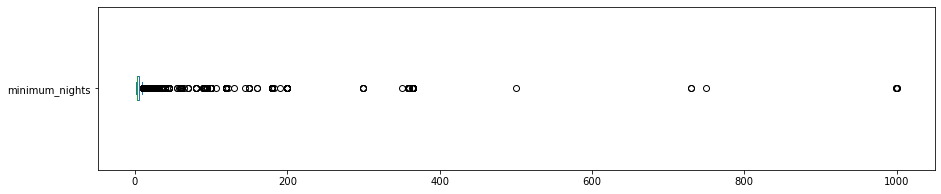

In [349]:
data.minimum_nights.plot(kind='box',vert=False, figsize=(15,3))

print('[minumum_nights] valores por encima de 365 días: {} registros'.format(len(data[data.minimum_nights>30])))
print('[minumum_nights] % de valores por encima de 365 días: {:.4f}% registros'.format((len(data[data.minimum_nights>30])/data.shape[0])*100))

[price_dls] valores por encima de 300 dólares: 282 registros
[price_dls] % de valores por encima de 300 dólares: 1.5713% registros


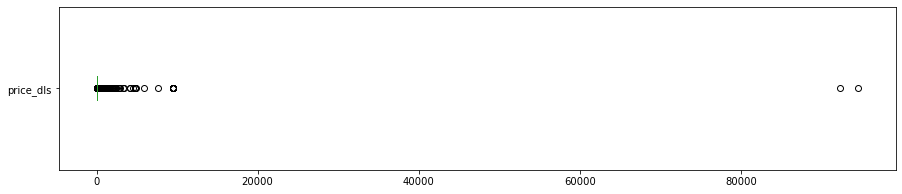

In [350]:
data.price_dls.plot(kind='box',vert=False, figsize=(15,3))

print('[price_dls] valores por encima de 300 dólares: {} registros'.format(len(data[data.price_dls>250])))
print('[price_dls] % de valores por encima de 300 dólares: {:.4f}% registros'.format((len(data[data.price_dls>250])/data.shape[0])*100))

In [351]:
data_original=data.copy()
data.drop(data[data.minimum_nights>30].index, axis=0, inplace=True)
data.drop(data[data.price_dls>250].index, axis=0, inplace=True)

## 5. Visualización de datos
Análisis y visualización de la base de datos limpia.

In [352]:
# base de datos limpia
data.tail()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,price_dls
17942,32279620,Lumiere Place Puerto Madero,408551,Guille,Dique 2,-34.61684,-58.36386,Entire home/apt,9988,3,70,2022-08-14,1.61,13,154,25,65.85
17943,27460266,••WELCOME! New Modern Suite Puerto Madero |CasaBA,183209971,Giselle,Dique 2,-34.61596,-58.36367,Entire home/apt,20265,3,11,2020-11-01,0.28,15,78,0,133.61
17944,46217105,☆PUERTO MADERO LUXURIOUS APARTMENT ☆ CasaBAires,183209971,Giselle,Dique 2,-34.61459,-58.36378,Entire home/apt,26055,3,5,2022-06-06,0.37,15,81,4,171.79
17945,31262931,Puerto Madero Elegant Suite | CasaBAires,183209971,Giselle,Dique 3,-34.60776,-58.36477,Entire home/apt,20265,3,19,2022-07-11,0.44,15,83,5,133.61
17946,32204376,Apartamento Puerto Madero 2 ambientes amplios!,122031954,Marta,Dique 2,-34.61520,-58.36415,Entire home/apt,11580,1,15,2020-01-01,0.35,1,65,0,76.35


### spatial data analysis (neighbourhood & latitude & longitude)

In [353]:
Long=-58.48
Lat=-34.60
locations = list(zip(data.latitude, data.longitude))

map1 = folium.Map(location=[Lat,Long], zoom_start=11)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [354]:
#los 15 mayores barrios con alquileres
n = 15
data['neighbourhood'].value_counts()[:n].index.tolist()

['Palermo',
 'Recoleta',
 'San Nicolas',
 'Retiro',
 'Belgrano',
 'Almagro',
 'Monserrat',
 'Balvanera',
 'Villa Crespo',
 'Nuñez',
 'San Telmo',
 'Colegiales',
 'Caballito',
 'Chacarita',
 'Puerto Madero']

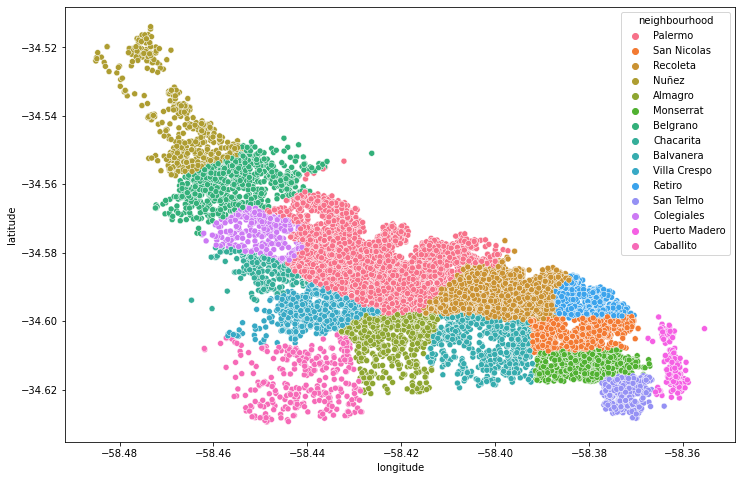

In [355]:
list_nbh = ["Palermo", "Recoleta", "San Nicolas", "Retiro", "Belgrano", "Monserrat", "Almagro", 
"Balvanera", "Villa Crespo", "Nuñez", "San Telmo", "Colegiales", "Caballito",
"Chacarita", "Puerto Madero"]
filtered_data = data.loc[data['neighbourhood'].isin(list_nbh)]

import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.scatterplot(x=filtered_data.longitude,y=filtered_data.latitude,hue=filtered_data.neighbourhood)
plt.show()

In [356]:
heat_df=data[['latitude','longitude','price_dls']]

hm = folium.Map(location=[-34.60,-58.48],
               tiles='stamentoner',
               zoom_start=11)
HeatMap(heat_df, 
        min_opacity=0.4,
        blur = 25
               ).add_to(folium.FeatureGroup(name='Heat Map').add_to(hm))
folium.LayerControl().add_to(hm)
hm

### room_type

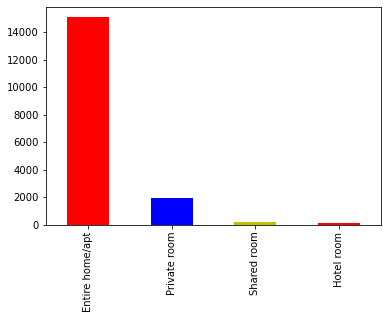

In [357]:
data['room_type'].value_counts().plot(kind='bar',color=['r','b','y'])
plt.show()

### price

In [358]:
source = pd.DataFrame(data.price_dls.value_counts()).reset_index().rename(columns={"index":"price", "frecuencia":"frequency"})
source.rename(columns={'price': 'Precio', 'price_dls': 'Frecuencia'}, inplace=True)

source

,Precio,Frecuencia
0,33.40,626
1,38.17,616
2,28.63,595
3,47.72,539
4,42.95,453
...,...,...
2036,25.67,1
2037,26.61,1
2038,12.66,1
2039,32.09,1


<AxesSubplot:xlabel='price_dls'>

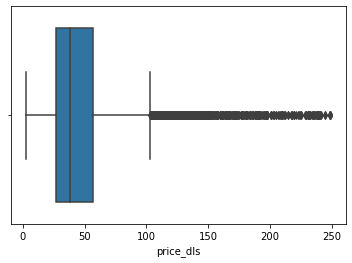

In [359]:
import seaborn as sns
sns.boxplot(x=data["price_dls"])

In [361]:
# price, general plot
alt.Chart(source_filtered).mark_bar().encode(
    alt.X('Precio', title="Precio"),
    alt.Y('Frecuencia', title="Frecuencia"),
    alt.Color('Precio', legend=None),
    tooltip=['Precio', 'Frecuencia']
).properties(title="Frecuencia de precios")

alt.Chart(...)

In [362]:
# price, histogram
alt.Chart(source_filtered).mark_bar().encode(
    alt.X('Precio', bin=True, title="Precio"),
    alt.Y('Frecuencia', title="Frecuencia"),
    alt.Color('Precio', bin=True, legend=None),
    tooltip=['Precio', 'Frecuencia']
).properties(title="Histograma de frecuencia de precios")

alt.Chart(...)

In [363]:
# price, density function
alt.Chart(source_filtered).transform_density(
    'Precio',
    as_=['Precio', 'Densidad'],
).mark_area().encode(
    alt.X("Precio:Q", title="Precio"),
    alt.Y('Densidad:Q', title="Probabilidad"),
    tooltip=['Precio']
).properties(title="Distribución de densidad de precios")

alt.Chart(...)

In [364]:
# price, log scale density function
alt.Chart(source_filtered).transform_density(
    'Precio',
    as_=['Precio', 'Densidad'],
).mark_area().encode(
    alt.X("Precio:Q", title="Precio"),
    y=alt.Y('Densidad:Q', scale=alt.Scale(type="log"), title="Probabilidad"),
    tooltip=['Precio']
).properties(title="Distribución de densidad de precios (usando log)")

alt.Chart(...)

### Mínimo de noches

In [365]:
source_noc = pd.DataFrame(data.minimum_nights.value_counts()).reset_index().rename(columns={"index":"Min_noches", "frecuencia":"frequency"})

In [366]:
# minimum nights, general plot
alt.Chart(source_noc).mark_bar().encode(
    alt.X('Min_noches', title="Mínimo de noches"),
    alt.Y('minimum_nights', title="Frecuencia"),
    alt.Color('Min_noches', legend=None),
    tooltip=['Min_noches', 'minimum_nights']
).properties(title="Frecuencia de mínimo de noches")

alt.Chart(...)

### number of reviews

In [367]:
source_rev = pd.DataFrame(data.number_of_reviews.value_counts()).reset_index().rename(columns={"index":"num_reviews", "frecuencia":"frequency"})

In [368]:
# number of reviews, general plot
alt.Chart(source_rev).mark_bar().encode(
    alt.X('num_reviews', title="Número de reseñas"),
    alt.Y('number_of_reviews', title="Frecuencia"),
    alt.Color('num_reviews', legend=None),
    tooltip=['num_reviews', 'number_of_reviews']
).properties(title="Frecuencia de número de reseñas")

alt.Chart(...)

In [369]:
q_low = data["number_of_reviews"].quantile(0.01)
q_hi  = data["number_of_reviews"].quantile(0.99)

df_filtered_rev = data[(data["number_of_reviews"] < q_hi) & (data["number_of_reviews"] > q_low)]

source_rev_2 = pd.DataFrame(df_filtered_rev.number_of_reviews.value_counts()).reset_index().rename(columns={"index":"num_reviews", "frecuencia":"frequency"})

In [370]:
# price, general plot
alt.Chart(source_rev_2).mark_bar().encode(
    alt.X('num_reviews', title="Número de reseñas"),
    alt.Y('number_of_reviews', title="Frecuencia"),
    alt.Color('num_reviews', legend=None),
    tooltip=['num_reviews', 'number_of_reviews']
).properties(title="Frecuencia de número de reseñas")

alt.Chart(...)

### availability_365

In [371]:
source_365 = pd.DataFrame(data.availability_365.value_counts()).reset_index().rename(columns={"index":"365", "frecuencia":"frequency"})

In [372]:
# number of reviews, general plot
alt.Chart(source_365).mark_bar().encode(
    alt.X('365', title="Número de días"),
    alt.Y('availability_365', title="Frecuencia"),
    alt.Color('365', legend=None),
    tooltip=['365', 'availability_365']
).properties(title="Frecuencia de número de días disponibles en un año")

alt.Chart(...)

### Mapa de correlación entre variables

<AxesSubplot:>

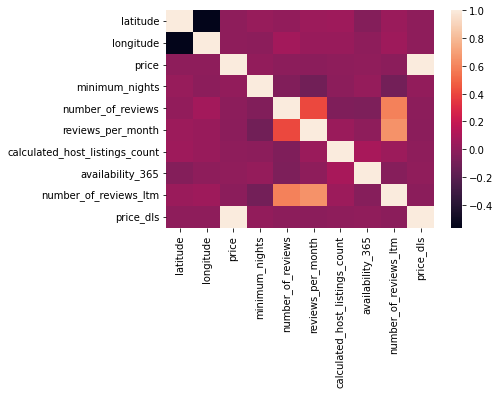

In [185]:
sns.heatmap(data.corr(),xticklabels=True, yticklabels=True)

<AxesSubplot:xlabel='room_type', ylabel='neighbourhood'>

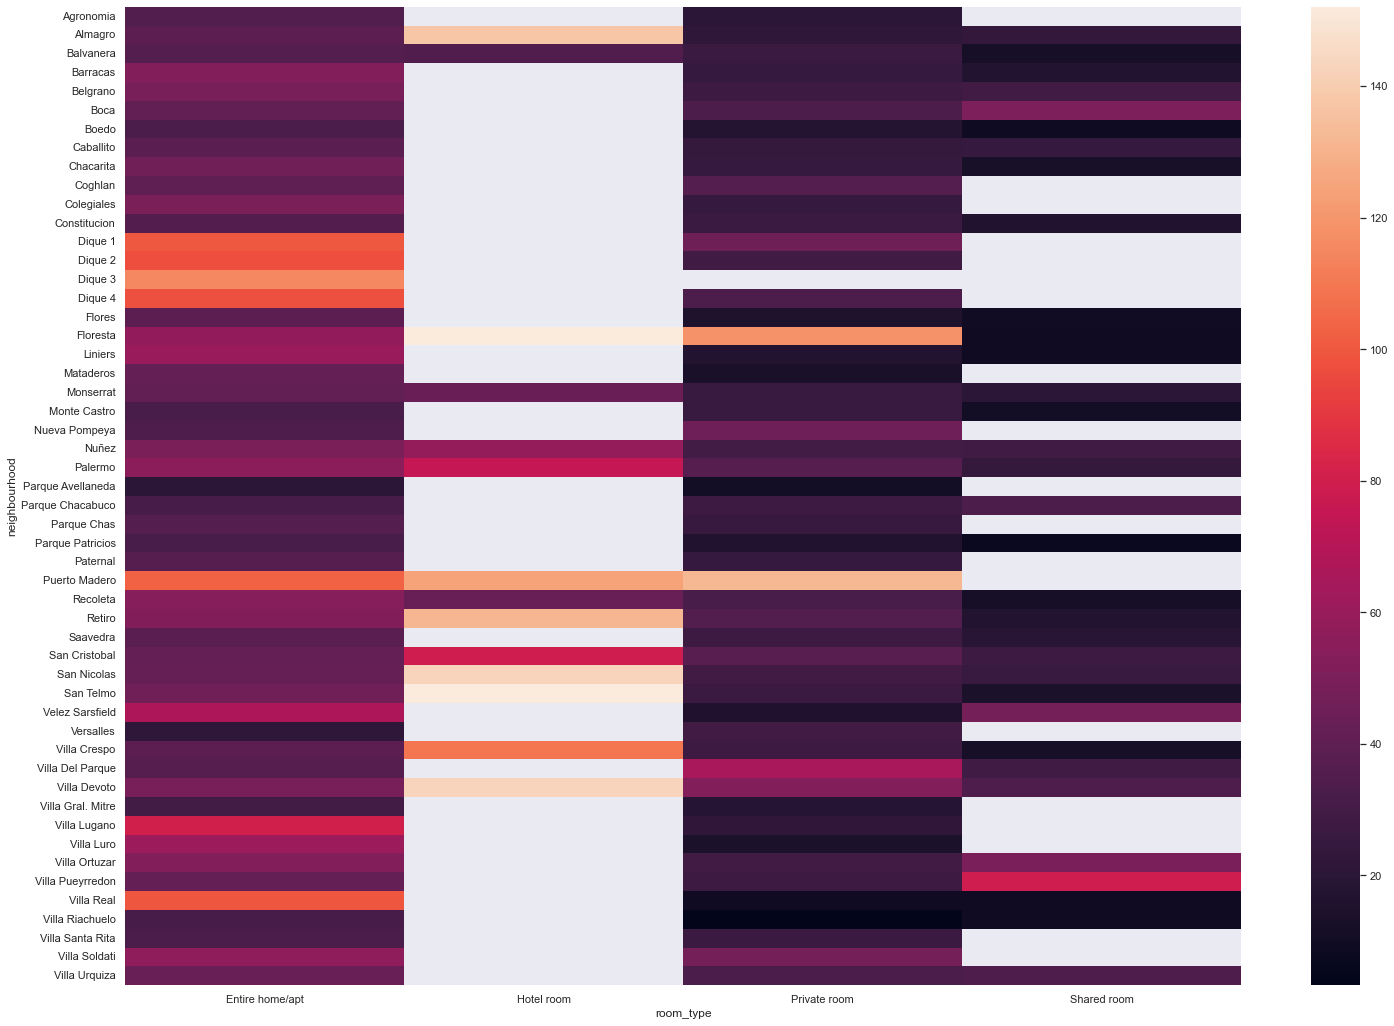

In [379]:
# Turn long format into a wide format
df_wide = data.pivot_table(index='neighbourhood', columns='room_type', values='price_dls')

# plot it
sns.set(rc={'figure.figsize':(25,18)})
sns.heatmap(df_wide)

## 6. EDA un proceso iterativo:
    - esto debido a que mientras vamos realizando el análisis nos damos cuenta de diversas situaciones o acciones que pueden mejorar nuestra base de datos, como limpiar alguna variable, transformar una variable ya sea en variables numéricas, categóricas o agrupandolas, y mientras más entedamos la base de datos será más fácil trabajar con ellas y realizar mejoras.
    - un ejemplo de ello a medida que se realizaban las gráficas nos dimos cuenta del impacto de los outliers y convenía retirarlo del dataset porque hacía que no fueran representativos los datos.
    

### 7. Referencias

- M. Curi. (Jun 23, 2022). [Analyzing Buenos Aires Airbnb Data](https://medium.com/@marimcuri/analyzing-buenos-aires-airbnb-data-d46f3d125aee). Medium
- Inside Airbnb (Sep 22, 2022). [Buenos Aires, Ciudad Autónoma de Buenos Aires, Argentina](http://insideairbnb.com/get-the-data). Inside Airbnb.
- RICHIEONE13 (2019). [AirBnB New York - EDA and Predictive Modelling 🏙](https://www.kaggle.com/code/richieone13/airbnb-new-york-eda-and-predictive-modelling/notebook)
- K. Katari. (Aug 21, 2020).[Exploratory Data Analysis(EDA): Python](https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14). Towards Data Science. 
- V. Dhole. (Jul 26, 2022).[Interesting Heatmaps Using Python Folium](https://blog.jovian.ai/interesting-heatmaps-using-python-folium-ee41b118a996). Medium. 



